In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.tab_model import TabNetClassifier

## 分類

### データセット

In [2]:
print(load_breast_cancer()["target_names"])

df = pd.concat([
           pd.DataFrame(load_breast_cancer()["data"], columns=load_breast_cancer()["feature_names"]), 
           pd.DataFrame(load_breast_cancer()["target"], columns=["target"])
            ], axis=1)

df.head(1)

['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [3]:
X_train, X_test, y_train, y_test    = train_test_split(df.drop("target", axis=1), df["target"], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

### 学習

In [4]:
cls = TabNetClassifier()

cls.fit(
            X_train=X_train.values,
            y_train=y_train.values,
            eval_set=[(X_valid.values, y_valid.values)],
            eval_name = ["valid"],
            eval_metric = ["auc"],
            max_epochs=200,
            patience=20, 
            batch_size=256, 
            virtual_batch_size=128,
            num_workers=0, 
            drop_last=False,
)

Device used : cpu
epoch 0  | loss: 0.75655 | valid_auc: 0.46335 |  0:00:00s
epoch 1  | loss: 0.64449 | valid_auc: 0.54545 |  0:00:00s
epoch 2  | loss: 0.53142 | valid_auc: 0.66708 |  0:00:00s
epoch 3  | loss: 0.48836 | valid_auc: 0.78051 |  0:00:00s
epoch 4  | loss: 0.37243 | valid_auc: 0.67076 |  0:00:00s
epoch 5  | loss: 0.30832 | valid_auc: 0.65889 |  0:00:00s
epoch 6  | loss: 0.2239  | valid_auc: 0.8751  |  0:00:00s
epoch 7  | loss: 0.18419 | valid_auc: 0.86855 |  0:00:00s
epoch 8  | loss: 0.14829 | valid_auc: 0.91319 |  0:00:00s
epoch 9  | loss: 0.13091 | valid_auc: 0.89107 |  0:00:00s
epoch 10 | loss: 0.11243 | valid_auc: 0.88534 |  0:00:00s
epoch 11 | loss: 0.11818 | valid_auc: 0.92711 |  0:00:01s
epoch 12 | loss: 0.14016 | valid_auc: 0.91114 |  0:00:01s
epoch 13 | loss: 0.13172 | valid_auc: 0.90049 |  0:00:01s
epoch 14 | loss: 0.10484 | valid_auc: 0.88247 |  0:00:01s
epoch 15 | loss: 0.09872 | valid_auc: 0.9312  |  0:00:01s
epoch 16 | loss: 0.11129 | valid_auc: 0.91073 |  0:00:

### 予測と評価

In [5]:
y_pred = cls.predict(X_test.values)

f1_score(y_test, y_pred)

0.0

### 特徴量の重要性

<BarContainer object of 30 artists>

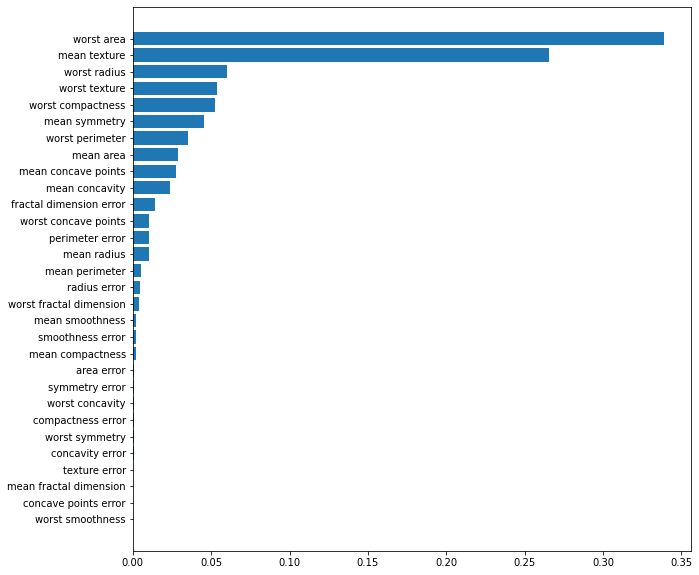

In [6]:
plt.figure(figsize=(10, 10))

future_importance = pd.DataFrame([cls.feature_importances_], columns=X_train.columns).T
future_importance = future_importance.sort_values(0)

plt.barh(future_importance.index, future_importance.values.flatten())

## 回帰

### データセット

In [7]:
df = pd.concat([
           pd.DataFrame(load_boston()["data"], columns=load_boston()["feature_names"]), 
           pd.DataFrame(load_boston()["target"], columns=["target"])
           ], axis=1)
                                      
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [8]:
X_train, X_test, y_train, y_test    = train_test_split(df.drop("target", axis=1), df["target"], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

### 学習

In [9]:
reg = TabNetRegressor()

reg.fit(
            X_train=X_train.values,
            y_train=y_train.values.reshape(-1, 1),
            eval_set=[(X_valid.values, y_valid.values.reshape(-1, 1))],
            eval_name = ["valid"],
            eval_metric = ["rmse"],
            max_epochs=200,
            patience=20, 
            batch_size=256, 
            virtual_batch_size=128,
            num_workers=0, 
            drop_last=False,
)

Device used : cpu
epoch 0  | loss: 635.55132| valid_rmse: 71.97947|  0:00:00s
epoch 1  | loss: 583.41405| valid_rmse: 62.73944|  0:00:00s
epoch 2  | loss: 544.80873| valid_rmse: 29.88002|  0:00:00s
epoch 3  | loss: 514.06158| valid_rmse: 27.36741|  0:00:00s
epoch 4  | loss: 481.69049| valid_rmse: 24.99495|  0:00:00s
epoch 5  | loss: 454.81417| valid_rmse: 23.07198|  0:00:00s
epoch 6  | loss: 422.57495| valid_rmse: 21.18393|  0:00:00s
epoch 7  | loss: 383.84071| valid_rmse: 21.40409|  0:00:00s
epoch 8  | loss: 341.91658| valid_rmse: 23.41911|  0:00:00s
epoch 9  | loss: 303.20304| valid_rmse: 30.50299|  0:00:00s
epoch 10 | loss: 262.22333| valid_rmse: 48.52612|  0:00:00s
epoch 11 | loss: 231.11828| valid_rmse: 60.03732|  0:00:00s
epoch 12 | loss: 189.78543| valid_rmse: 73.67635|  0:00:00s
epoch 13 | loss: 154.70808| valid_rmse: 83.52357|  0:00:00s
epoch 14 | loss: 131.14289| valid_rmse: 94.79163|  0:00:00s
epoch 15 | loss: 99.86883| valid_rmse: 105.5284|  0:00:01s
epoch 16 | loss: 76.684

In [10]:
y_pred = reg.predict(X_test.values)

np.sqrt(mean_absolute_error(y_test, y_pred))

4.220274326289036

### 特徴量の重要性

<BarContainer object of 13 artists>

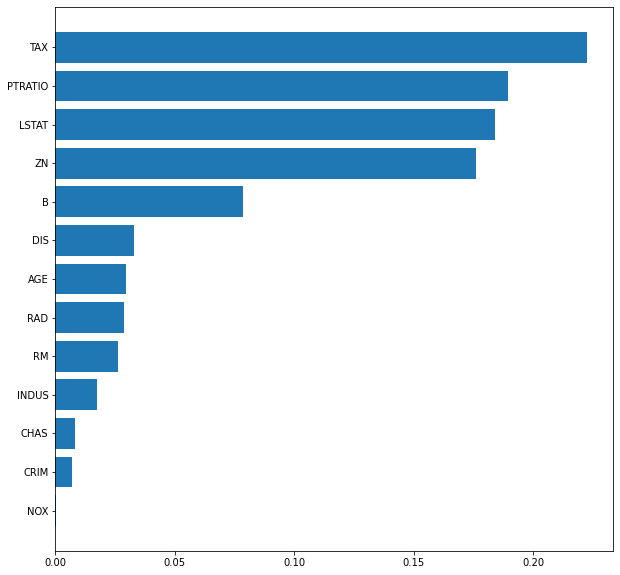

In [11]:
plt.figure(figsize=(10, 10))

future_importance = pd.DataFrame([reg.feature_importances_], columns=X_train.columns).T
future_importance = future_importance.sort_values(0)

plt.barh(future_importance.index, future_importance.values.flatten())